<a href="https://colab.research.google.com/github/alex-smith-uwec/CS-420/blob/main/genetic/GA_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6">
The purpose of this notebook is understand and visualize individuals, fitness function, and crossover for 8-Queens, Traveling Salesperson, and Terrain.
</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
random.seed(42)

# What does an individual look like? 8-Queens, Traveling Salesperson, Terrain


<font size="4">A configuration of 8 queens on a chessboard. We reduce to one queen per column</font>

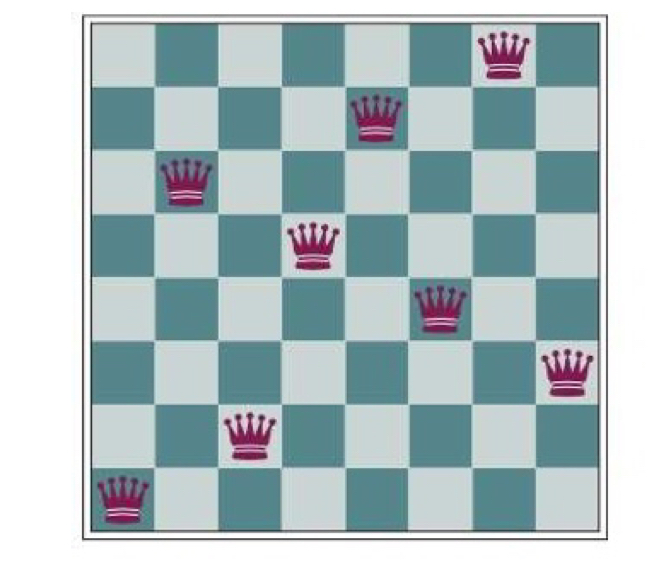

In [ ]:
individual_board=[1, 6, 2, 5, 7, 4, 8, 3]

<font size="4">Traveling Salesperson</font>

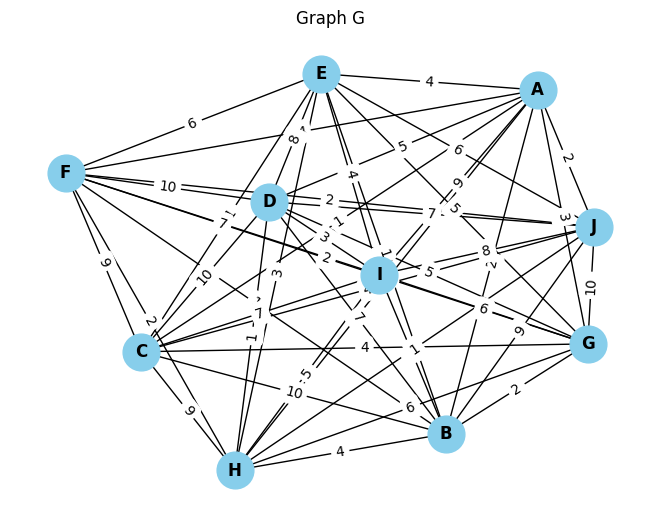

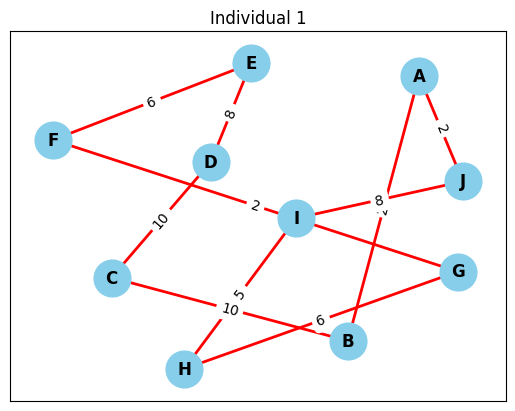

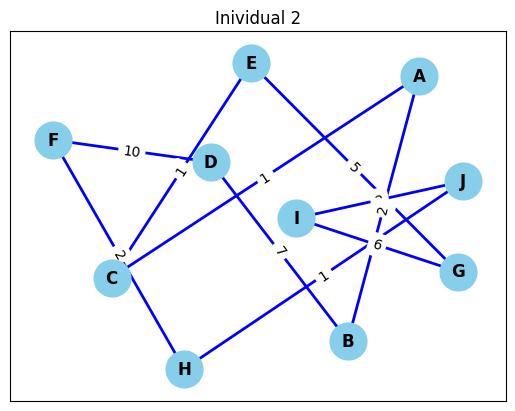

In [ ]:
# @title
def filter_labels(labels, circuit):
    return {k: labels[k] for k in circuit if k in labels} | \
           {k[::-1]: labels[k[::-1]] for k in circuit if k[::-1] in labels}

# Create an empty graph
G = nx.Graph()

# Define 10 nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
G.add_nodes_from(nodes)

# Add weighted edges (You can customize these weights)
edges = [(chr(65+i), chr(65+j), random.randint(1, 10)) for i in range(10) for j in range(i+1, 10)]
G.add_weighted_edges_from(edges)

# Create two circuits
circuit1 = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'A')]
circuit2 = [('A', 'C'), ('C', 'E'), ('E', 'G'), ('G', 'I'), ('I', 'J'), ('J', 'H'), ('H', 'F'), ('F', 'D'), ('D', 'B'), ('B', 'A')]


# Layout
pos = nx.spring_layout(G, seed=42)  # Fixed seed for layout

# First plot showing G
plt.figure(1)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph G")

# Second plot showing circuit1
plt.figure(2)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=circuit1, edge_color='r', width=2)
labels1 = filter_labels(labels, circuit1)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels1)
plt.title("Individual 1")

# Third plot showing circuit2
plt.figure(3)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=circuit2, edge_color='b', width=2)
labels2 = filter_labels(labels, circuit2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels2)
plt.title("Inividual 2")

# Show the plots
plt.show()










In [ ]:
individual_trip1 = 'ABCDEFGHIJ'
individual_trip2 = 'ABDFHJIGEC'

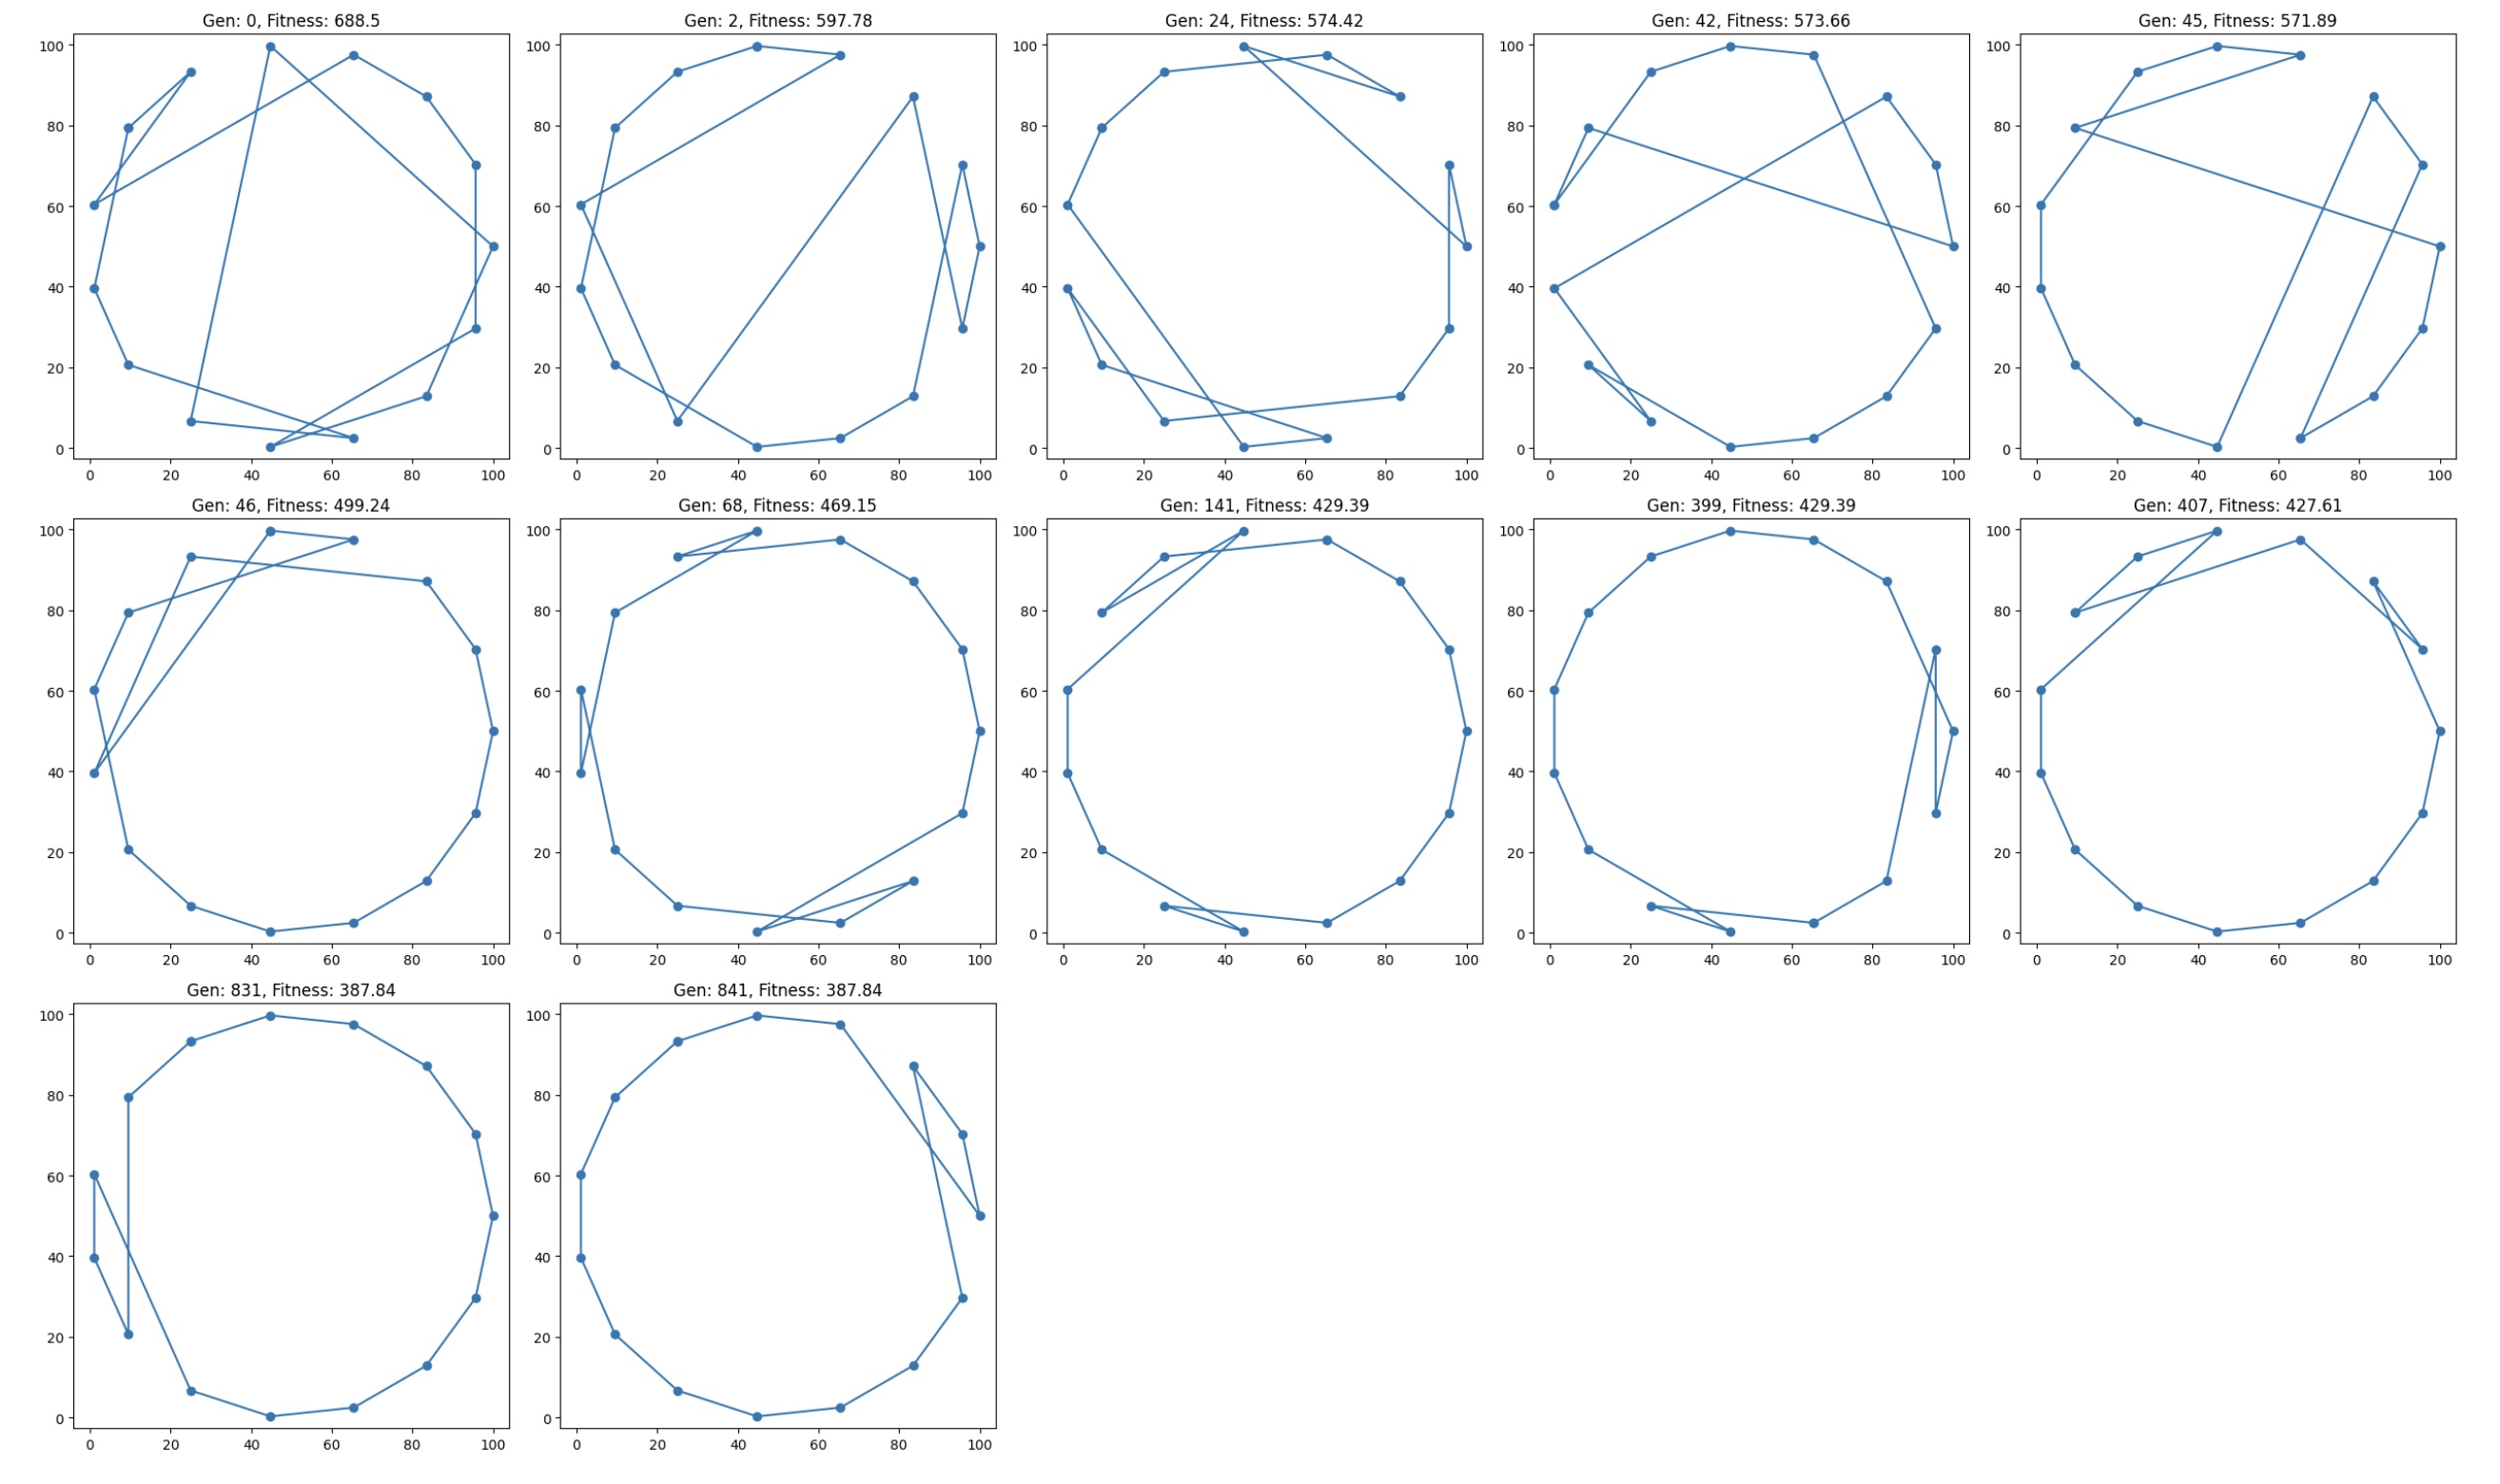

<font size="4">Terrain</font>

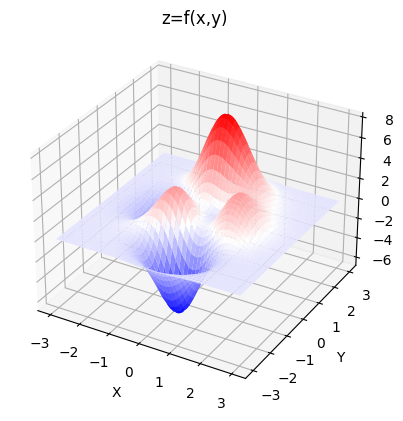

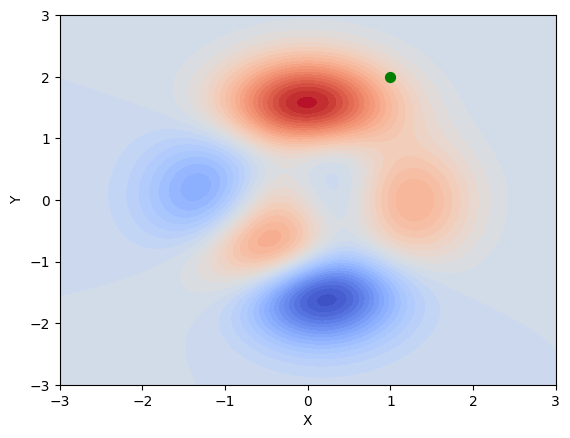

In [ ]:
# @title
# Create the meshgrid
x, y = np.linspace(-3, 3, 300), np.linspace(-3, 3, 300)
x, y = np.meshgrid(x, y)

# Define the function
z = 3*(1-x)**2*np.exp(-x**2 - (y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2 - y**2) - 1/3*np.exp(-(x+1)**2 - y**2)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with the 'coolwarm' colormap
ax.plot_surface(x, y, z, cmap='bwr')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('z=f(x,y)')

# Show the plot
plt.show()

plt.figure()

cp = plt.contourf(x, y, z, levels=40, cmap='coolwarm')  # contourf for filled contours
plt.scatter(1, 2, color='green', s=50)
# plt.colorbar(cp)  # add a color bar

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
# plt.title('Contour Plot of the Function')

# Show the plot
plt.show()


In [ ]:
individual_location=[1,2]

# What is the fitness function in each context: 8-Queens, Traveling Salesperson, Terrain

<font size="4">8 queens: # conflicts</font>

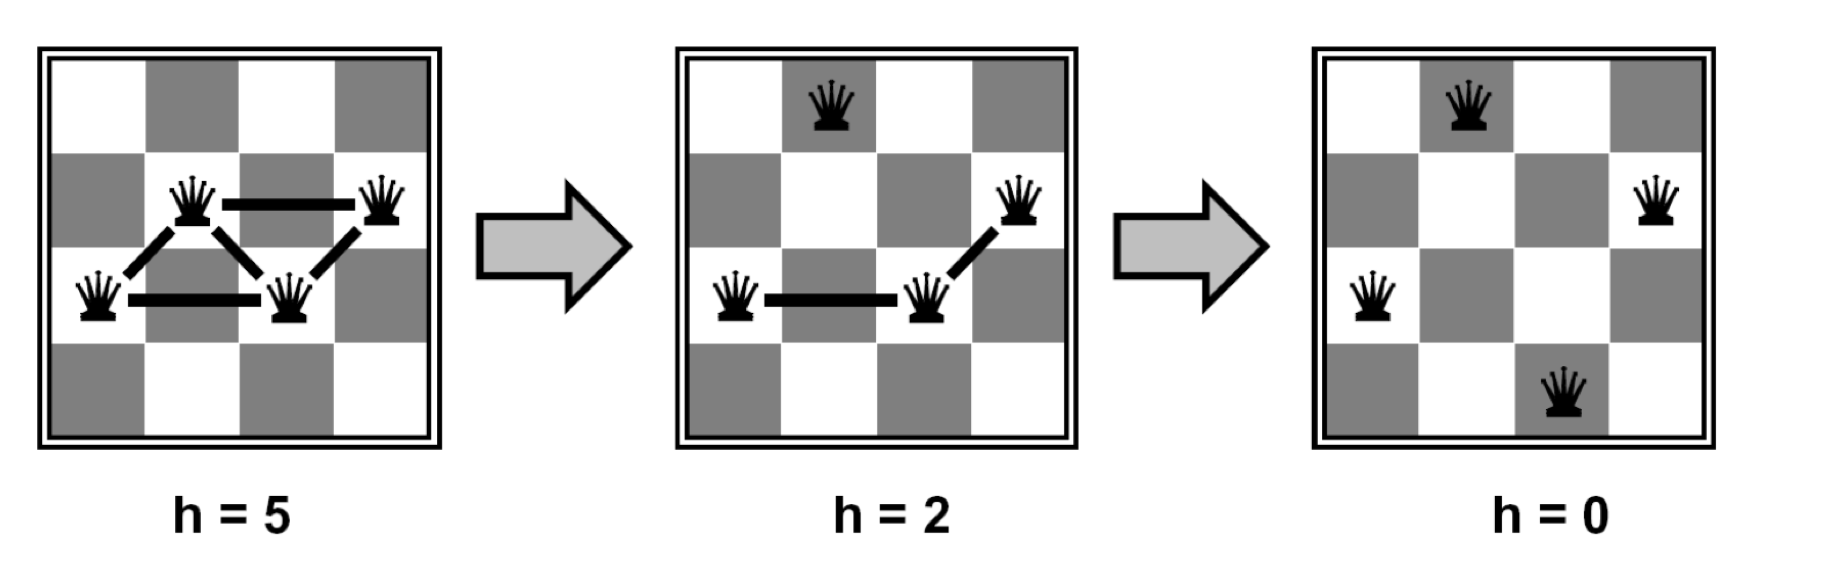

In [ ]:
def calculate_fitness(individual):
    clashes = 0
    for i in range(8):
        for j in range(i + 1, 8):
            # Check for clashes in rows and diagonals
            if individual[i] == individual[j] or abs(individual[i] - individual[j]) == abs(i - j):
                clashes += 1

<font size="4">Traveling Salesperson: length of circuit</font>

Text(0.5, 1.0, 'Individual 1')

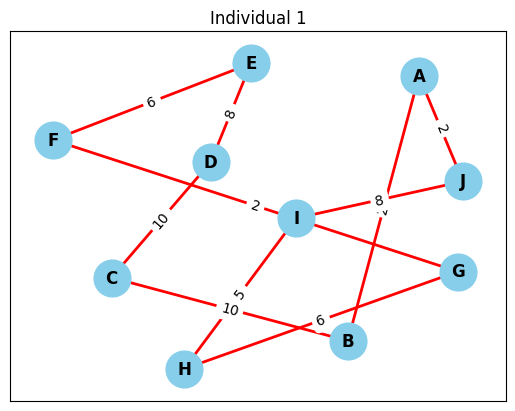

In [ ]:
# @title
# plt.figure(2)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=circuit1, edge_color='r', width=2)
labels1 = filter_labels(labels, circuit1)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels1)
plt.title("Individual 1")

In [ ]:
circuit = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'A']

# Calculate the sum of edge weights in the circuit
total_weight = 0
for i in range(len(circuit) - 1):
    start_node = circuit[i]
    end_node = circuit[i + 1]
    weight = G[start_node][end_node]['weight']
    total_weight += weight
print("Total weight of the circuit [A B C D E F G H I J A] is:", total_weight)

Total weight of the circuit [A B C D E F G H I J A] is: 59


<font size="4">Terrain: elevation z=f(x,y)</font>

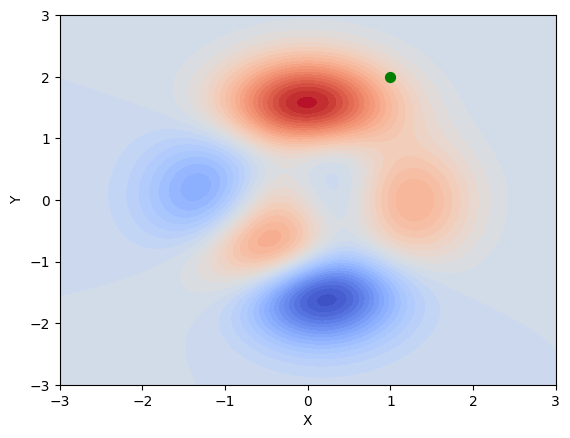

In [ ]:
# @title
plt.figure()

cp = plt.contourf(x, y, z, levels=40, cmap='coolwarm')  # contourf for filled contours
plt.scatter(1, 2, color='green', s=50)
# plt.colorbar(cp)  # add a color bar

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
# plt.title('Contour Plot of the Function')

# Show the plot
plt.show()

plt.show()


In [ ]:
def f(x, y):
    term1 = 3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2)
    term2 = -10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
    term3 = -1 / 3 * np.exp(-(x + 1)**2 - y**2)
    return term1 + term2 + term3

In [ ]:
f(1,2)

2.2099347948240657

# What does crossover look like in each context: 8-Queens, Traveling Salesperson, Terrain

8-Queens, saw the two boards!

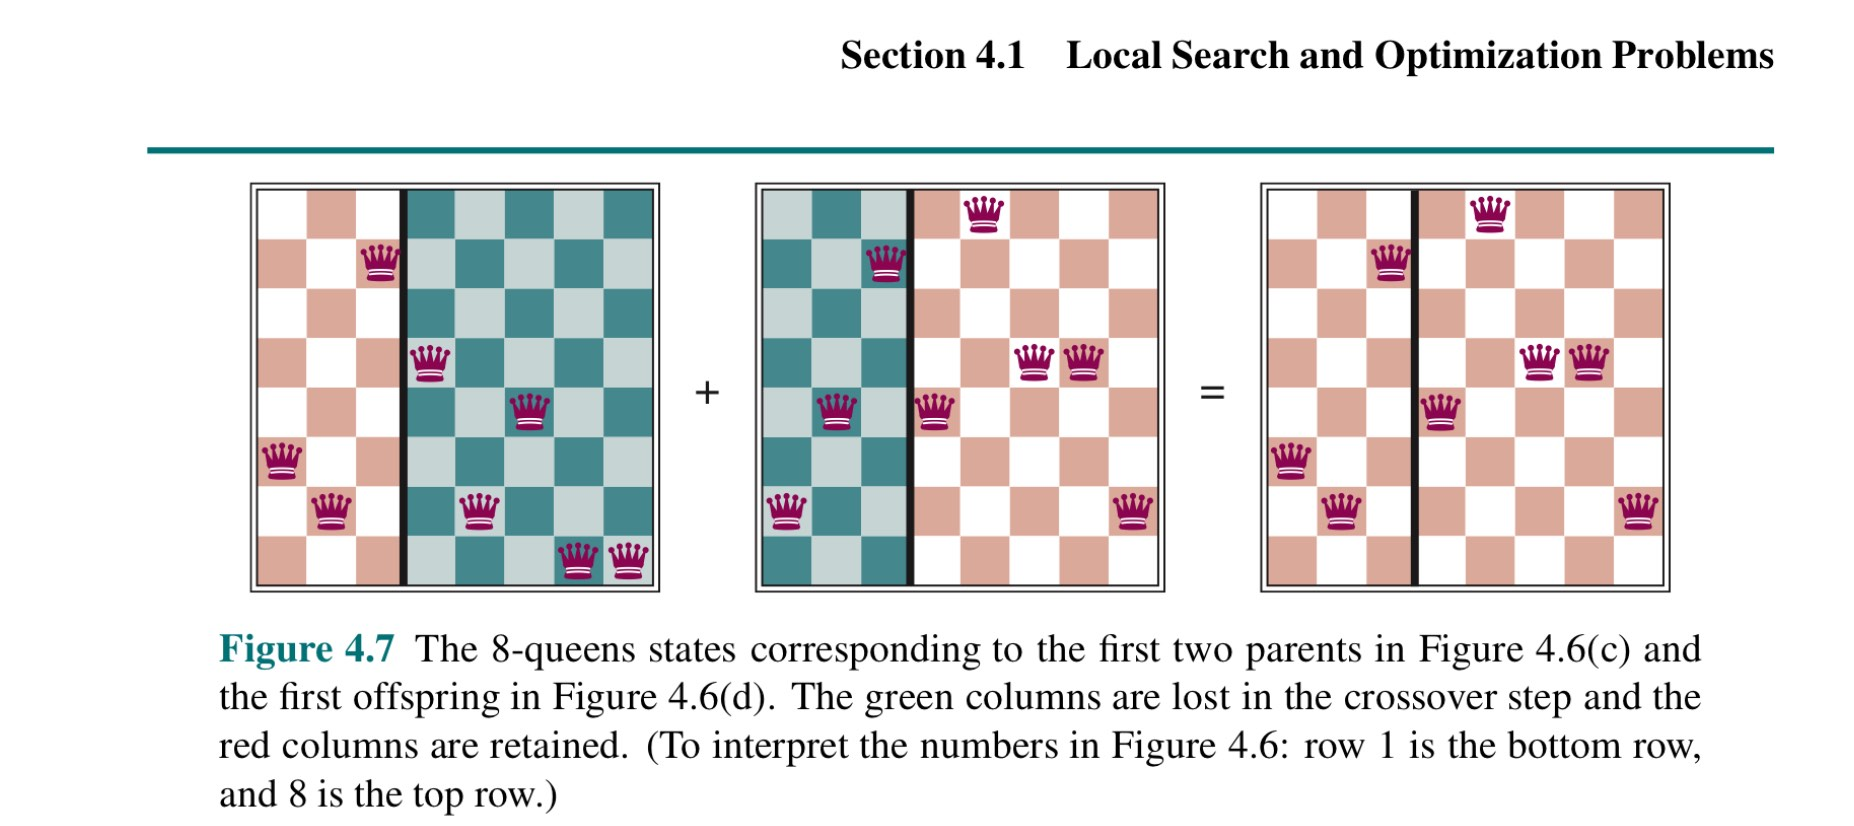

In [ ]:
# @title
df = pd.DataFrame([[3, 2, 7, 5, 2, 4, 1, 1],
                   [2, 4, 7, 4, 8, 5, 5, 2],
                  [3,2,7,4,8,5,5,2],
                   [2,4,7,5,2,4,1,1]],
                  index=['Parent1', 'Parent2','ChildA','ChildB'],
                  columns=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8'])

df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
Parent1,3,2,7,5,2,4,1,1
Parent2,2,4,7,4,8,5,5,2
ChildA,3,2,7,4,8,5,5,2
ChildB,2,4,7,5,2,4,1,1


Traveling Salesperson

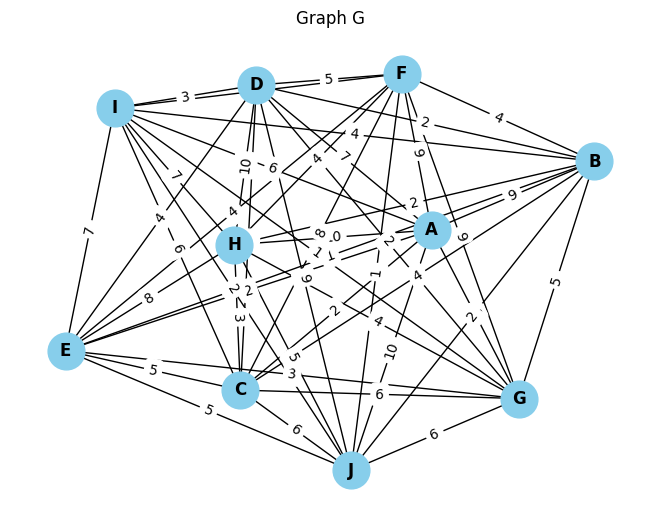

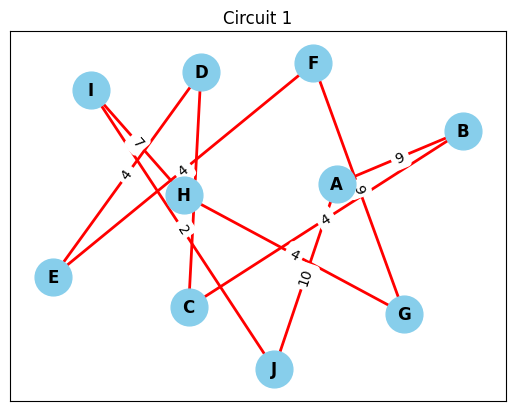

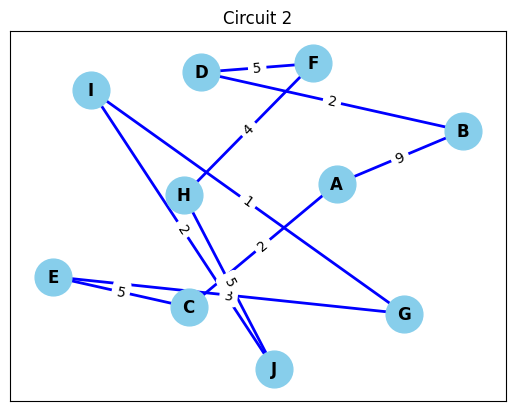

In [ ]:
# @title
def filter_labels(labels, circuit):
    return {k: labels[k] for k in circuit if k in labels} | \
           {k[::-1]: labels[k[::-1]] for k in circuit if k[::-1] in labels}

# Create an empty graph
G = nx.Graph()

# Define 10 nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
G.add_nodes_from(nodes)

# Add weighted edges (You can customize these weights)
edges = [(chr(65+i), chr(65+j), random.randint(1, 10)) for i in range(10) for j in range(i+1, 10)]
G.add_weighted_edges_from(edges)

# Create two circuits
circuit1 = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'A')]
circuit2 = [('A', 'C'), ('C', 'E'), ('E', 'G'), ('G', 'I'), ('I', 'J'), ('J', 'H'), ('H', 'F'), ('F', 'D'), ('D', 'B'), ('B', 'A')]


# Layout
pos = nx.spring_layout(G, seed=42)  # Fixed seed for layout

# First plot showing G
plt.figure(1)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph G")

# Second plot showing circuit1
plt.figure(2)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=circuit1, edge_color='r', width=2)
labels1 = filter_labels(labels, circuit1)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels1)
plt.title("Circuit 1")

# Third plot showing circuit2
plt.figure(3)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=circuit2, edge_color='b', width=2)
labels2 = filter_labels(labels, circuit2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels2)
plt.title("Circuit 2")



# Show the plots
plt.show()

In [ ]:
# @title
dg = pd.DataFrame([
    list("ABCDEFGHIJ"),
    list("ACEGIJHFDB"),
    list("**ABCD****"),
    list("**ABCDHFEG"),
    list("IJABCDHFEG")
])

# Display the DataFrame
dg

,0,1,2,3,4,5,6,7,8,9
0,A,B,C,D,E,F,G,H,I,J
1,A,C,E,G,I,J,H,F,D,B
2,*,*,A,B,C,D,*,*,*,*
3,*,*,A,B,C,D,H,F,E,G
4,I,J,A,B,C,D,H,F,E,G


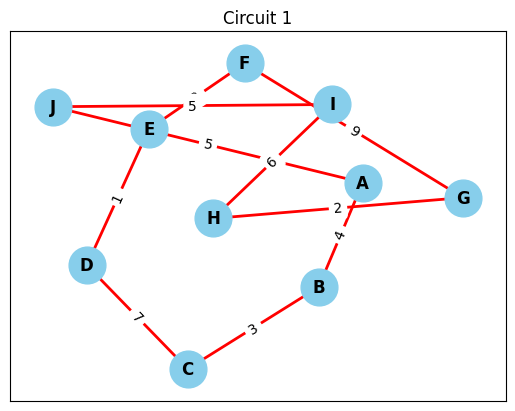

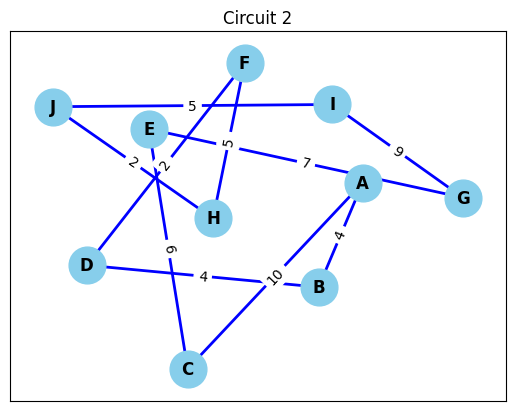

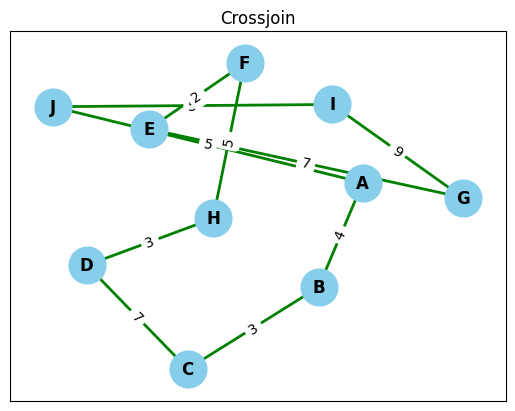

In [ ]:
# @title
def filter_labels(labels, circuit):
    return {k: labels[k] for k in circuit if k in labels} | \
           {k[::-1]: labels[k[::-1]] for k in circuit if k[::-1] in labels}

# Create an empty graph
G = nx.Graph()

# Define 10 nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
G.add_nodes_from(nodes)

# Add weighted edges (You can customize these weights)
edges = [(chr(65+i), chr(65+j), random.randint(1, 10)) for i in range(10) for j in range(i+1, 10)]
G.add_weighted_edges_from(edges)

# Create two circuits
circuit1 = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'A')]
circuit2 = [('A', 'C'), ('C', 'E'), ('E', 'G'), ('G', 'I'), ('I', 'J'), ('J', 'H'), ('H', 'F'), ('F', 'D'), ('D', 'B'), ('B', 'A')]


# Layout
pos = nx.spring_layout(G, seed=42)  # Fixed seed for layout

# First plot showing G
# plt.figure(1)
# nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue')
# labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# plt.title("Graph G")

# Second plot showing circuit1
plt.figure(2)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=circuit1, edge_color='r', width=2)
labels1 = filter_labels(labels, circuit1)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels1)
plt.title("Circuit 1")

# Third plot showing circuit2
plt.figure(3)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=circuit2, edge_color='b', width=2)
labels2 = filter_labels(labels, circuit2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels2)
plt.title("Circuit 2")

circuit3 = [('I', 'J'), ('J', 'A'), ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'H'), ('H', 'F'), ('F', 'E'), ('E', 'G'),('G','I')]

# Fourth plot showing crosslver
plt.figure(4)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=circuit3, edge_color='g', width=2)
labels3 = filter_labels(labels, circuit3)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels3)
plt.title("crossover")

# Show the plots
plt.show()

Terrain crossover

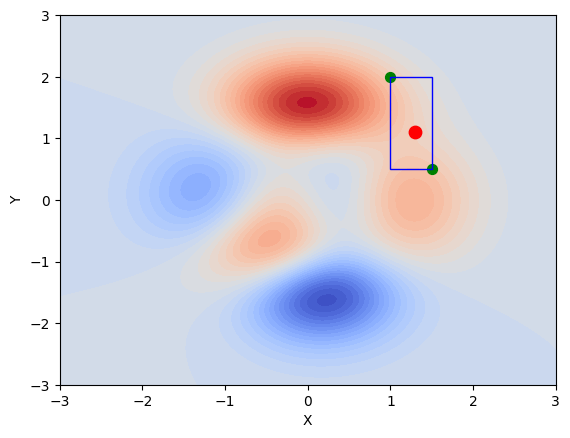

In [ ]:
# @title
from matplotlib.patches import Rectangle
plt.figure()

cp = plt.contourf(x, y, z, levels=40, cmap='coolwarm')  # contourf for filled contours
plt.scatter(1, 2, color='green', s=50)
plt.scatter(1.5, 0.5, color='green', s=50)
plt.scatter(1.3,1.1,color='red',s=80)
# plt.colorbar(cp)  # add a color bar

rectangle = Rectangle((1.5, 0.5), width=-0.5, height=1.5, edgecolor='blue', facecolor='none')

# Add the rectangle to the plot
plt.gca().add_patch(rectangle)
# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
# plt.title('Contour Plot of the Function')

# Show the plot
plt.show()

plt.show()